In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Titanic-Dataset.csv') # reading data

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# create new column by merging 'SibSp' 'Parch' and name it 'Family Size'

df['Family Size'] = df['SibSp'] + df['Parch'] + 1
df.drop(columns=['SibSp', 'Parch'], inplace=True)

In [5]:
df.describe() # analysing dataframe

,PassengerId,Survived,Pclass,Age,Fare,Family Size
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,32.204208,1.904602
std,257.353842,0.486592,0.836071,14.526497,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,28.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200,11.000000


In [6]:
df.isnull().sum() # finding null values from data frame

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family Size      0
dtype: int64

In [7]:
df['Cabin'].isnull().sum()

687

In [8]:
df['Age'].isnull().sum()

177

In [9]:
female_age = df[df['Sex'] == 'female']['Age'] # filter the age of female

In [10]:
female_age.sample(3)

10     4.0
381    1.0
367    NaN
Name: Age, dtype: float64

In [11]:
male_age = df[df['Sex'] == 'male']['Age'] # filter the age of female

In [12]:
male_age.sample(3)

78      0.83
420      NaN
292    36.00
Name: Age, dtype: float64

In [13]:
# getting the median of male and female
male_median = male_age.median()
female_median = female_age.median()
male_median, female_median

(29.0, 27.0)

In [14]:
medians = df.groupby('Sex')['Age'].median() # getting the median of age in series
medians

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [15]:
# replacing NaN to median values

df.set_index(['Sex'], inplace=True)  # setting 'Sex' as index for lookup

df['Age'] = df['Age'].fillna(medians) # filling the NaN 'Age' cells

df.reset_index(inplace=True) # reseting index to default after operation

**Ploting b/w Survival and Non Survival**

In [16]:
X = df.groupby('Survived').size() # getting how many survived and dead
X

Survived
0    549
1    342
dtype: int64

In [17]:
# creating variables for both survived and death
number_of_deaths = X[0]
number_of_survival = X[1]

In [18]:
number_of_deaths, number_of_survival

(549, 342)

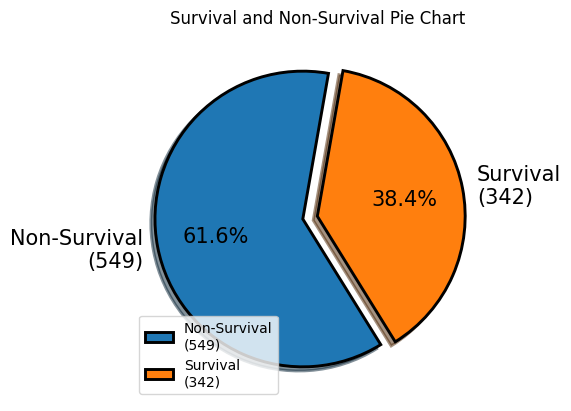

In [19]:
# ploting pie chart (B/w how many survived and how many dead)
x=[number_of_deaths, number_of_survival]
labels = [f'Non-Survival\n({number_of_deaths})', f'Survival\n({number_of_survival})']
explode = [0.1, 0.0]

plt.pie(x=x, autopct='%1.1f%%', shadow=True, labels=labels, startangle=80, labeldistance=1.1, 
        textprops={'fontsize':15}, explode=explode, wedgeprops={'linewidth': 2.1, 'edgecolor':'black'})

plt.title('Survival and Non-Survival Pie Chart')

plt.legend(loc=3)
plt.savefig('Analysis Output/Survival and Non-Survival (Pie Chart).png', transparent=None, dpi=200, bbox_inches='tight') # saving the figure
plt.show()

**Analysis**-<br>
&rarr; It can be analyzed that

<li>Total Percentage of Number of Deaths = 61.61%

<li>Total Percentage of Number of Survivors = 38.38%

<hr>

# Number of Passenger Travelled in each class ?

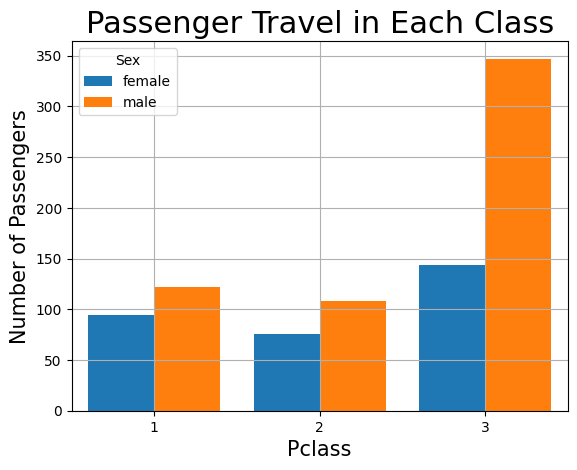

In [20]:
sns.countplot(x='Pclass', data=df, hue='Sex', saturation=10)


plt.ylabel('Number of Passengers', fontdict={'fontsize':15})
plt.xlabel('Pclass', fontdict={'fontsize':15})

plt.title('Passenger Travel in Each Class', fontsize = 22)

plt.grid()
plt.savefig('Analysis Output/Passenger Travel in Each Class (Count Plot).png', transparent=None, dpi=200, bbox_inches='tight')
plt.show()

<hr>

# How does survival rate vary by passenger class (Pclass)?

In [21]:
df.head()

,Sex,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,Cabin,Embarked,Family Size
0,male,1,0,3,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,NaN,S,2
1,female,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C85,C,2
2,female,3,1,3,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,female,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,C123,S,2
4,male,5,0,3,"Allen, Mr. William Henry",35.0,373450,8.0500,NaN,S,1


In [22]:
# calculating total passenger
total_passenger = df.groupby('Pclass').size().sum() 
total_passenger

891

In [23]:
# calculaing passenger by Pclass
total_passenger_in_class = df.groupby('Pclass').size()
total_passenger_in_class

Pclass
1    216
2    184
3    491
dtype: int64

In [24]:
# Calculating Survived Passenger in each class
total_survived_in_each_class = df[df['Survived'] == 1].groupby('Pclass').size()
total_survived_in_each_class

Pclass
1    136
2     87
3    119
dtype: int64

In [25]:
# calculating Survival Rate
total_survival_rate = total_survived_in_each_class / total_passenger_in_class * 100
total_survival_rate

Pclass
1    62.962963
2    47.282609
3    24.236253
dtype: float64

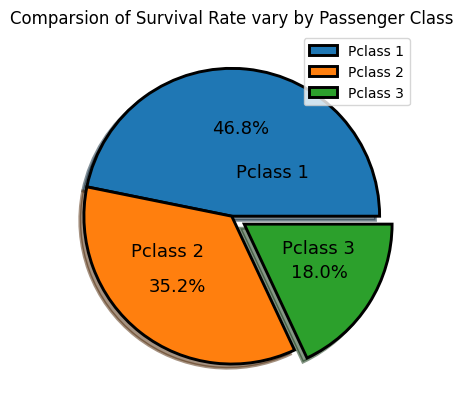

In [26]:
# Ploting Pie chart of Survival rate vary by passenger class
labels = ['Pclass 1', 'Pclass 2', 'Pclass 3']
explode = [0.0, 0.0, 0.1]

x = [total_survival_rate[1], total_survival_rate[2], total_survival_rate[3]]
plt.pie(x, autopct='%.1f%%', shadow=True, labels=labels, labeldistance=.3, 
        wedgeprops={'linewidth':2.1, 'edgecolor': 'black'}, explode=explode, textprops={'fontsize': 13})

plt.title('Comparsion of Survival Rate vary by Passenger Class')
plt.legend()
plt.savefig('Analysis Output/Comparsion of Survival Rate vary by Passenger Class(Pie Chart).png', transparent=None, dpi=200, bbox_inches='tight')
plt.show()

This Analysis Shows the Survival rate if Passenger travels in any of the class

<hr>
<hr>

# Survival Rate by Gender

In [27]:
df.sample(2)

,Sex,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,Cabin,Embarked,Family Size
10,female,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,PP 9549,16.7000,G6,S,3
643,male,644,1,3,"Foo, Mr. Choong",29.0,1601,56.4958,NaN,S,1


In [28]:
# Distributing passenger by Sex
total_passenger_by_gender = df.groupby('Sex').size()
total_passenger_by_gender

Sex
female    314
male      577
dtype: int64

In [29]:
# Survivor Among those Sex
survivors_by_gender = df.groupby('Sex')['Survived'].sum()
survivors_by_gender

Sex
female    233
male      109
Name: Survived, dtype: int64

In [30]:
# Calculating Rate of survival by Gnder
survival_rate_by_gender = survivors_by_gender / total_passenger_by_gender * 100
survival_rate_by_gender

Sex
female    74.203822
male      18.890815
dtype: float64

Text(38.347222222222214, 0.5, 'Number of Passengers')

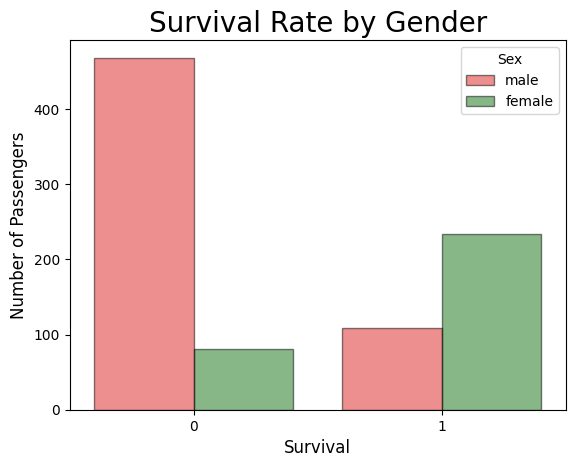

In [31]:
# PLoting Survival Rate By Gender
sns.countplot(data=df, x='Survived', palette=['red', 'green'], hue='Sex', linewidth=1, edgecolor='black', alpha=0.5)
plt.title('Survival Rate by Gender', fontsize=20)

plt.xlabel('Survival', fontsize=12)
plt.savefig('Analysis Output/Survival Rate by Gender(Count Plot).png', transparent=None, dpi=200, bbox_inches='tight')
plt.ylabel('Number of Passengers', fontsize=12)

# Age distribution for survivors and non-survivors

[]

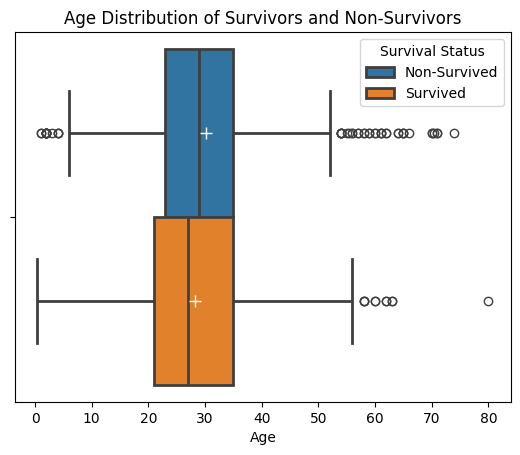

In [32]:
# ploting age distribution of survival and non survival
labels = ['Non-Survived', 'Survived']

ax = sns.boxplot(data=df, x='Age', hue='Survived', linewidth = 2, 
                 showmeans=True, meanprops={'marker':'+', 
                                            'markeredgecolor':'white', 
                                            'markersize':9})

handles = ax.get_legend_handles_labels()[0]

plt.legend(handles=handles, labels=labels, title='Survival Status')

plt.title('Age Distribution of Survivors and Non-Survivors')
plt.savefig('Analysis Output/Age Distribution of Survival and Non-Survival.png', transparent=None, dpi=200, bbox_inches='tight')
plt.plot()

In [33]:
df.groupby('Survived')['Age'].median() # Calculating median of age of survived and non survived

Survived
0    29.0
1    27.0
Name: Age, dtype: float64

<hr>
<hr>

# Compare fare distributions between survivors and non-survivors.


In [34]:
df.sample(2)

,Sex,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,Cabin,Embarked,Family Size
631,male,632,0,3,"Lundahl, Mr. Johan Svensson",51.0,347743,7.0542,NaN,S,1
397,male,398,0,2,"McKane, Mr. Peter David",46.0,28403,26.0000,NaN,S,1


<Axes: xlabel='Fare'>

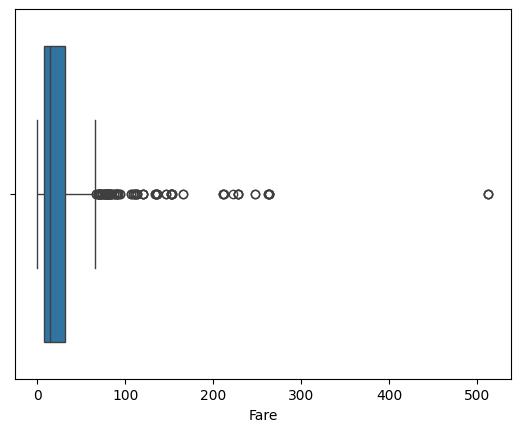

In [35]:
# we observer that  there is onw outlier, which is very different from other one
sns.boxplot(data=df, x='Fare')

**<h3>Since the one of the fare is too high (outliers), so we replace it with median**

In [36]:
# calculating median of Fare
median_fare = df['Fare'].median()
median_fare

14.4542

In [37]:
# calculating max fare to replace with
max_fare = df['Fare'].max()
max_fare

512.3292

In [38]:
df.replace(max_fare, median_fare, inplace=True) # replacing max fare to median fare

In [39]:
median_fare = df['Fare'].median()
median_fare

14.4542

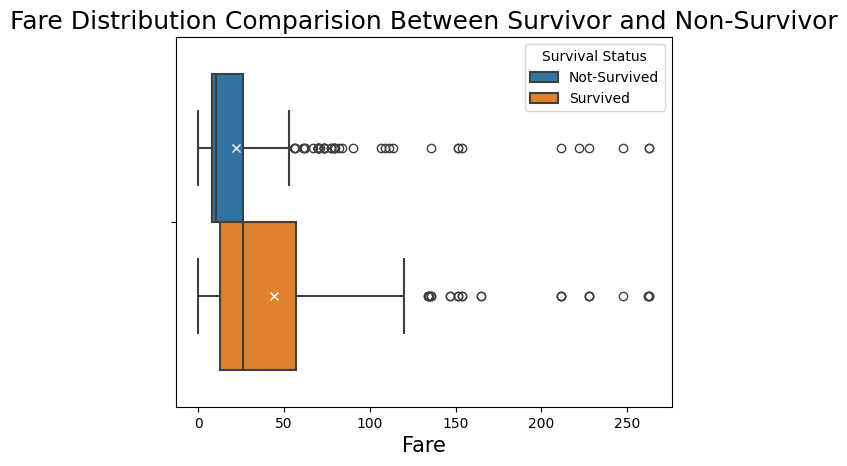

In [40]:
# again ploting Box plot of Fare
ax = sns.boxplot(data=df, x='Fare', hue='Survived', linewidth = 1.5,
           showmeans=True, meanprops={
               'marker': 'x',
               'markeredgecolor': 'white',
           })

labels = ['Not-Survived', 'Survived']
handles = ax.get_legend_handles_labels()[0]

plt.legend(handles=handles, labels=labels, title='Survival Status')

plt.title('Fare Distribution Comparision Between Survivor and Non-Survivor', fontsize=18)

plt.xlabel('Fare', fontsize=15)

plt.savefig('Analysis Output/Fare Distribution Between Survival and Non-Survival(Box Plot).png', transparent=None, dpi=200, bbox_inches='tight')

plt.show()

In [41]:
# Grouping Median Fare to Survival
median_fare = df.groupby('Survived')['Fare'].median()
median_fare

Survived
0    10.5
1    26.0
Name: Fare, dtype: float64

<hr>
<hr>

# Survival rates based on the number of Family Members Size

In [42]:
df.sample(2)

,Sex,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,Cabin,Embarked,Family Size
196,male,197,0,3,"Mernagh, Mr. Robert",29.0,368703,7.750,NaN,Q,1
693,male,694,0,3,"Saad, Mr. Khalil",25.0,2672,7.225,NaN,C,1


In [43]:
# Family counts of Survival
family_survival_counts = df.groupby(['Family Size', 'Survived']).size().reset_index(name='Count')
family_survival_counts

,Family Size,Survived,Count
0,1,0,374
1,1,1,163
2,2,0,72
3,2,1,89
4,3,0,43
5,3,1,59
6,4,0,8
7,4,1,21
8,5,0,12
9,5,1,3


In [44]:
# making different data frame for survival and non survival

survival_rate = family_survival_counts[family_survival_counts['Survived'] == 1].reset_index(drop=True)
survival_rate = pd.DataFrame(survival_rate)

death_rate = family_survival_counts[family_survival_counts['Survived'] == 0].reset_index(drop=True)
death_rate = pd.DataFrame(death_rate)
print(death_rate)

survival_rate.rename(columns={'Count':'Count of Survived'}, inplace=True)
survival_rate

   Family Size  Survived  Count
0            1         0    374
1            2         0     72
2            3         0     43
3            4         0      8
4            5         0     12
5            6         0     19
6            7         0      8
7            8         0      6
8           11         0      7


,Family Size,Survived,Count of Survived
0,1,1,163
1,2,1,89
2,3,1,59
3,4,1,21
4,5,1,3
5,6,1,3
6,7,1,4


In [45]:
# merging important columns from both the data frame into new dataframe

both_rate = pd.merge(survival_rate[['Family Size', 'Count of Survived']], death_rate[['Family Size', 'Count']], on='Family Size', how='right')

both_rate['Count of Survived'].fillna(0, inplace=True) # replacing Nan values to 0

both_rate.rename(columns={'Count of Survived': 'Survived',
                          'Count': 'Not Survived'}, inplace=True) # Renaming it to meaningful name
both_rate['Survived'] = both_rate['Survived'].astype(int) # converting float(worthless) to int for memory conservation
both_rate

C:\Users\write\AppData\Local\Temp\ipykernel_21048\754920656.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  both_rate['Count of Survived'].fillna(0, inplace=True) # replacing Nan values to 0


,Family Size,Survived,Not Survived
0,1,163,374
1,2,89,72
2,3,59,43
3,4,21,8
4,5,3,12
5,6,3,19
6,7,4,8
7,8,0,6
8,11,0,7


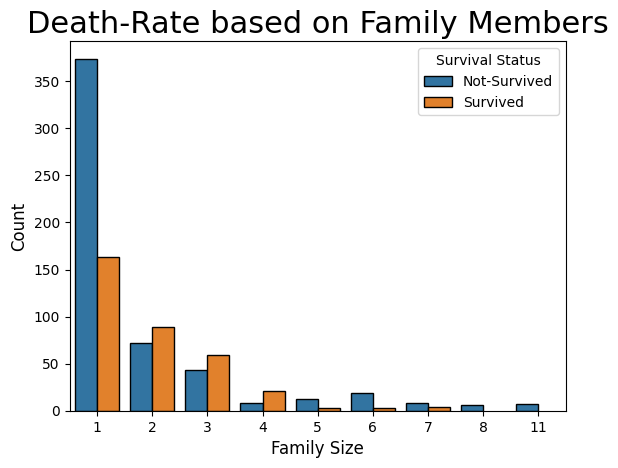

In [46]:
# Now ploting a bar plot of that merged data frame

ax = sns.barplot(data=family_survival_counts, x='Family Size', y='Count', hue='Survived', edgecolor='black')

plt.title('Death-Rate based on Family Members', fontsize=22)

plt.ylabel('Count', fontsize=12)
plt.xlabel('Family Size', fontsize=12)

labels = ['Not-Survived', 'Survived']
handles = ax.get_legend_handles_labels()[0]

plt.legend(handles=handles, labels=labels, title='Survival Status')
plt.savefig('Analysis Output/Death Rate Based on Family Members (Bar Plot).png', transparent=None, dpi=200, bbox_inches='tight')
plt.show()